<a href="https://colab.research.google.com/github/tallninja/ml-projects/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## My First Neural Network

In this neural network I'll be using the MNIST dataset since it is the "Hello World" of AI 

### Step 1: Load the dataset 

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Step 2: Inspect the dataset

In [9]:
# Training data
ntrain_images = len(train_images) # number of training images
strain_images = train_images.shape[1:] # size of the training images
ntrain_labels = len(train_labels)

print(f"Shape of training images: {train_images.shape}")
print(f"Number of training images: {ntrain_images}")
print(f"Size of training images: {strain_images}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Number of training labels: {ntrain_labels}")

Shape of training images: (60000, 28, 28)
Number of training images: 60000
Size of training images: (28, 28)
Shape of training labels: (60000,)
Number of training labels: 60000


In [10]:
# Testing data
ntest_images = len(test_images) # number of test images
stest_images = test_images.shape[1:] # size of the test images
ntest_labels = len(test_labels)

print(f"Shape of test images: {test_images.shape}")
print(f"Number of test images: {ntest_images}")
print(f"Size of test images: {stest_images}")
print(f"Shape of test labels: {test_labels.shape}")
print(f"Number of test labels: {ntest_labels}")

Shape of test images: (10000, 28, 28)
Number of test images: 10000
Size of test images: (28, 28)
Shape of test labels: (10000,)
Number of test labels: 10000


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

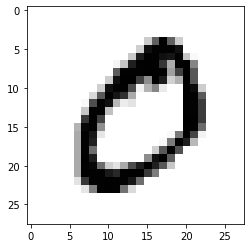

In [15]:
# just one sample

sample = 1
image = train_images[sample]
fig = plt.figure()
plt.imshow(image, cmap='gray_r') # use cmap='gray' for a black background and white foreground
plt.show()

### Step 4: Data Preprocessing

In [25]:
def prod(tup):
  try:
    return tup[0] * tup[1]
  except:
    return tup[0]

In [26]:
# We will reshape the images
# We will normalize i.e the pixel values should take the range [0, 1]

train_images = train_images.reshape((len(train_images), prod(train_images.shape[1:])))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape(len(test_images), prod(test_images.shape[1:]))
test_images = test_images.astype("float32") / 255

### Step 5: Defining the model

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
model = keras.Sequential(
    [
     layers.Dense(512, activation="relu"),
     layers.Dense(10, activation="softmax")
    ]
)

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Step 5: Training the model

In [47]:
len(train_images)

60000

In [51]:
model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0756 - accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0735 - accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0691 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0675 - accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0634 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0617 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0599 - accuracy: 0.9837
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.058

### Step 6: Testing the model

In [54]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[6]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [55]:
predictions[6].argmax()

4

In [57]:
test_labels[6]

4

In [60]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 [==============================] - 0s 1ms/step - loss: 42.7631 - accuracy: 0.9540
Test Accuracy: 0.9539999961853027
Test Loss: 42.76311492919922


From the above metrics the model is clearly overfitting